In [29]:
% matplotlib inline
import torch
from PIL import Image
import numpy as np
from torchvision.transforms import ToTensor, ToPILImage
import matplotlib.pyplot as plt 

shape of img:   (360, 248, 3) | max: 255, min: 0


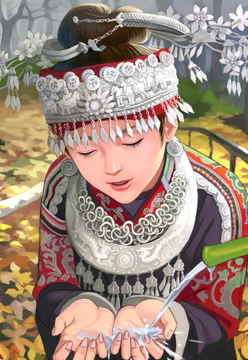

In [2]:
file = 'test2.png'
img_pil = Image.open(file)
img = np.array(img_pil)
print('shape of img: %15s | max: %d, min: %d' % (str(img.shape), img.max(), img.min()))
img_pil

# YCbCr in PIL

shape of img_ycbcr: (360, 248, 3)   | max: 255, min: 6
shape of img_y:     (360, 248)      | max: 255, min: 6


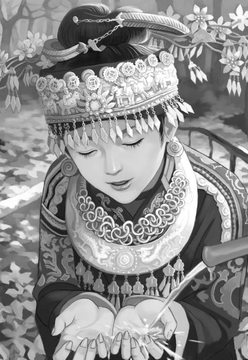

In [3]:
img_pil_ycbcr = img_pil.convert('YCbCr')
img_ycbcr = np.array(img_pil_ycbcr)
print('shape of img_ycbcr: %-15s | max: %d, min: %d' % (str(img_ycbcr.shape), img_ycbcr.max(), img_ycbcr.min()))

img_y = img_ycbcr[:, :, 0]
img_y_pil = Image.fromarray(img_y, "L")
print('shape of img_y:     %-15s | max: %d, min: %d' % (str(img_y.shape), img_y.max(), img_y.min()))
img_y_pil

# Customized YCbCr

(360, 248)
shape of img_y_: (360, 248)      | max: 235, min: 21


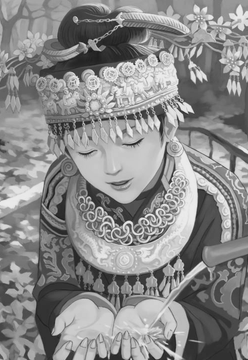

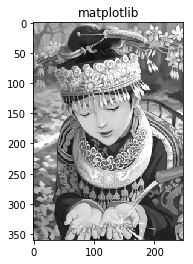

In [4]:
# reference: https://imxieyi.com/2018/03/24/在python中正确地将rgb转换成ycbcr/
def rgb2ycbcr(rgb):
    m = np.array([[65.481, 128.553, 24.966],
                  [-37.797, -74.203, 112.0],
                  [112.0, -93.786, -18.214]])
    shape = rgb.shape
    if len(shape) == 3:
        rgb = rgb.reshape((shape[0] * shape[1], 3))
    ycbcr = np.dot(rgb, m.transpose() / 255.)
    ycbcr[:,0] += 16.
    ycbcr[:,1:] += 128.
    return ycbcr.reshape(shape)
 
img_y_ = rgb2ycbcr(img)[:, :, 0]

# print
print(img_y_.shape)
print('shape of img_y_: %-15s | max: %d, min: %d' % (str(img_y_.shape), img_y_.max(), img_y_.min()))

# imshow
plt.imshow(img_y_, cmap='gray')
plt.title('matplotlib')
Image.fromarray(np.uint8(img_y_), "L")

# Pytorch ToTensor

In [6]:
print('{:=^40}'.format(' Original '))
img_tensor = ToTensor()(img_pil)
print('        shape of PIL:', np.array(img_pil).shape)
print('shape after ToTensor:', tuple(img_tensor.size()))
print(img_tensor.max().item(), img_tensor.min().item())


print('\n{:=^40}'.format(' Y channel '))
img_y_tensor = ToTensor()(img_y_pil)
print('        shape of PIL:', img_y_pil.size)
print('shape after ToTensor:', tuple(img_y_tensor.size()))

print(img_y_tensor.max().item(), img_y_tensor.min().item())

=============== Original ===============
        shape of PIL: (360, 248, 3)
shape after ToTensor: (3, 360, 248)
1.0 0.0

============== Y channel ===============
        shape of PIL: (248, 360)
shape after ToTensor: (1, 360, 248)
1.0 0.0235294122248888


In [12]:
img_re_pil = ToPILImage()(img_tensor)
print(np.array(img_re_pil).shape)

(360, 248, 3)


0.949999988079071 0.0
242 0


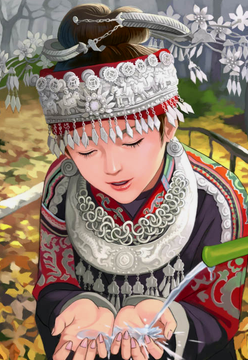

In [32]:
img_tensor_sub = torch.clamp(img_tensor - 0.05, min=0.0, max=1.0)
print(img_tensor_sub.max().item(), img_tensor_sub.min().item())
img_re_pil_sub = ToPILImage()(img_tensor_sub)

img_re_sub= np.array(img_re_pil_sub)
print(img_re_sub.max(), img_re_sub.min())
img_re_pil_sub

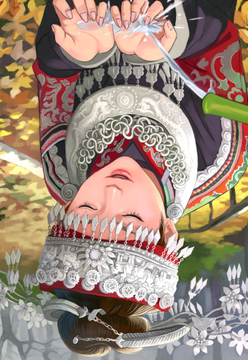

In [38]:
img_proc = img[::-1, :, :]
Image.fromarray(np.uint8(img_proc), "RGB")

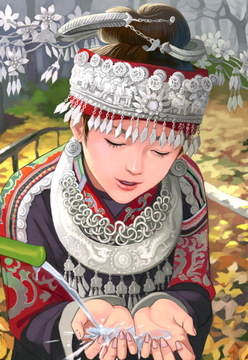

In [39]:
img_proc = img[:, ::-1, :]
Image.fromarray(np.uint8(img_proc), "RGB")